<a href="https://colab.research.google.com/github/liizaaa/machine_learning/blob/main/%D0%BF%D0%BE%D0%BA%D0%B5%D0%BC%D0%BE%D0%BD%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('pokemon.csv')
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [ ]:
df.columns.tolist()

['abilities',
 'against_bug',
 'against_dark',
 'against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying',
 'against_ghost',
 'against_grass',
 'against_ground',
 'against_ice',
 'against_normal',
 'against_poison',
 'against_psychic',
 'against_rock',
 'against_steel',
 'against_water',
 'attack',
 'base_egg_steps',
 'base_happiness',
 'base_total',
 'capture_rate',
 'classfication',
 'defense',
 'experience_growth',
 'height_m',
 'hp',
 'japanese_name',
 'name',
 'percentage_male',
 'pokedex_number',
 'sp_attack',
 'sp_defense',
 'speed',
 'type1',
 'type2',
 'weight_kg',
 'generation',
 'is_legendary']

посмотрим уникальные значения

In [ ]:
unique_types = pd.unique(df[['type1', 'type2']].values.ravel('K'))
unique_generations = sorted(df['generation'].unique())
legendary_counts = df['is_legendary'].value_counts()
unique_types = [t for t in unique_types if pd.notna(t)]
{
    "Уникальные типы": unique_types,
    "Поколения": unique_generations,
    "Легендарные/обычные покемоны": legendary_counts.to_dict()
}

{'Уникальные типы': ['grass',
  'fire',
  'water',
  'bug',
  'normal',
  'poison',
  'electric',
  'ground',
  'fairy',
  'fighting',
  'psychic',
  'rock',
  'ghost',
  'ice',
  'dragon',
  'dark',
  'steel',
  'flying'],
 'Поколения': [np.int64(1),
  np.int64(2),
  np.int64(3),
  np.int64(4),
  np.int64(5),
  np.int64(6),
  np.int64(7)],
 'Легендарные/обычные покемоны': {0: 731, 1: 70}}

In [ ]:
missing_data = df.isnull().sum()
missing_data[missing_data > 0]

,0
height_m,20
percentage_male,98
type2,384
weight_kg,20


не думаю, что нам будут сильно мешаться пропуски, но можно с ними поиграться

заполним percentage_male, height_m и weight_kg средним значением по столбцу
а type2 оставим пустым

In [ ]:
df['percentage_male'] = df['percentage_male'].fillna(df['percentage_male'].mean())
df['height_m'] = df['height_m'].fillna(df['height_m'].mean())
df['weight_kg'] = df['weight_kg'].fillna(df['weight_kg'].mean())
missing_data = df.isnull().sum()
missing_data[missing_data > 0]

,0
type2,384


##Выведем самые-самые покемоны по разным основаниям

самые-самые покемоны по stats

In [ ]:
max_stats = {
    'hp': df.loc[df['hp'].idxmax()],
    'attack': df.loc[df['attack'].idxmax()],
    'defense': df.loc[df['defense'].idxmax()],
    'sp_attack': df.loc[df['sp_attack'].idxmax()],
    'sp_defense': df.loc[df['sp_defense'].idxmax()],
    'speed': df.loc[df['speed'].idxmax()],
    'base_total': df.loc[df['base_total'].idxmax()],
}
max_stats_df = pd.DataFrame(max_stats).T
max_stats_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
hp,"['Natural Cure', 'Serene Grace', 'Healer']",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,0.0,242,75,135,55,normal,NaN,46.8,2,0
attack,"['Swarm', 'Guts', 'Moxie']",0.5,0.5,1.0,1.0,2.0,0.5,2.0,4.0,1.0,...,50.0,214,40,105,75,bug,fighting,54.0,2,0
defense,"['Rock Head', 'Sturdy', 'Sheer Force']",0.5,1.0,0.5,0.0,0.5,2.0,2.0,0.5,1.0,...,50.0,208,55,95,30,steel,ground,400.0,2,0
sp_attack,"['Pressure', 'Unnerve']",2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,55.155761,150,194,120,140,psychic,NaN,122.0,1,1
sp_defense,"['Sturdy', 'Gluttony', 'Contrary']",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,50.0,213,10,230,5,bug,rock,20.5,2,0
speed,['Pressure'],2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,55.155761,386,95,90,180,psychic,NaN,60.8,3,1
base_total,"['Pressure', 'Unnerve']",2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,55.155761,150,194,120,140,psychic,NaN,122.0,1,1


самые-самые покемоны каждого поколения.

In [ ]:
strongest_by_generation = df.loc[df.groupby('generation')['base_total'].idxmax()]
strongest_by_generation

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
149,"['Pressure', 'Unnerve']",2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,55.155761,150,194,120,140,psychic,NaN,122.0,1,1
247,"['Sand Stream', 'Unnerve']",2.0,0.5,1.0,1.0,2.0,4.0,0.5,0.5,0.5,...,50.000000,248,95,120,71,rock,dark,202.0,2,0
383,['Air Lock'],0.5,1.0,2.0,1.0,2.0,0.5,0.5,1.0,1.0,...,55.155761,384,180,100,115,dragon,flying,206.5,3,1
492,['Multitype'],1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,55.155761,493,120,120,120,normal,NaN,320.0,4,1
645,"['Pressure', 'Teravolt', 'Turboblaze']",1.0,1.0,2.0,0.5,2.0,2.0,1.0,1.0,1.0,...,55.155761,646,170,100,95,dragon,ice,325.0,5,1
717,"['Aura Break', 'Power Construct']",1.0,1.0,2.0,0.0,2.0,1.0,0.5,1.0,1.0,...,55.155761,718,91,95,85,dragon,ground,284.6,6,1
790,['Full Metal Body'],1.0,2.0,0.5,1.0,0.5,1.0,2.0,0.5,2.0,...,55.155761,791,113,89,97,psychic,steel,230.0,7,1


средние значения Base_total по типам покемонов

In [ ]:
legendary_vs_non_legendary = df.groupby('is_legendary')['base_total'].mean()

legendary_vs_non_legendary

,base_total
is_legendary,
0,410.481532
1,615.257143


среднее значение base_total для легендарных покемонов составляет 615.26, в то время как для нелегендарных покемонов — 410.48. Это подтверждает, что легендарные покемоны, в среднем, значительно сильнее

средние значения base_total по поколениям

In [ ]:
average_base_total_by_generation = df.groupby('generation')['base_total'].mean()
average_base_total_by_generation

,base_total
generation,
1,416.251656
2,413.180000
3,420.022222
4,451.177570
5,427.038462
6,437.611111
7,448.162500


можем заметить, что заметной разницы среднего значения base_total нет, тем не менее поколение 4 имеет наибольшее среднее значение

рассчитаем средние значения статистик для покемонов по типам и поколениям. hp, attack, defense, speed и base_total и тд

In [ ]:
average_stats_by_type_and_generation = df.groupby(['type1', 'type2', 'generation'])[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_total']].mean().reset_index()
average_stats_by_type_and_generation

,type1,type2,generation,hp,attack,defense,sp_attack,sp_defense,speed,base_total
0,bug,electric,5,60.0,62.0,55.0,77.0,55.0,86.5,395.5
1,bug,electric,7,67.0,76.0,92.5,100.0,75.0,39.5,450.0
2,bug,fairy,7,50.0,50.0,50.0,75.0,55.0,104.0,384.0
3,bug,fighting,2,80.0,185.0,115.0,40.0,105.0,75.0,600.0
4,bug,fighting,7,89.0,138.0,88.0,95.0,45.0,115.0,570.0
...,...,...,...,...,...,...,...,...,...,...
231,water,psychic,7,68.0,105.0,70.0,70.0,70.0,92.0,475.0
232,water,rock,2,65.0,55.0,95.0,65.0,95.0,35.0,410.0
233,water,rock,3,100.0,90.0,130.0,45.0,65.0,55.0,485.0
234,water,rock,5,64.0,93.0,118.0,68.0,55.0,27.0,425.0


Есть ли связь характеристик и роста покемонов? Веса?
проведем анализ корреляции между характеристиками (например, hp, attack, defense, speed) и height_m (рост)/weight_kg (вес). Это покажет, насколько сильно они связаны.



In [ ]:
correlation_with_height_weight = df[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'height_m', 'weight_kg']].corr()
correlation_with_height_weight

,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg
hp,1.000000,0.410616,0.242378,0.365973,0.366971,0.160760,0.473163,0.423089
attack,0.410616,1.000000,0.468915,0.368154,0.265836,0.352703,0.418681,0.378137
defense,0.242378,0.468915,1.000000,0.241882,0.526348,0.007934,0.357813,0.419234
sp_attack,0.365973,0.368154,0.241882,1.000000,0.511496,0.438981,0.346736,0.240862
sp_defense,0.366971,0.265836,0.526348,0.511496,1.000000,0.225977,0.324967,0.303386
speed,0.160760,0.352703,0.007934,0.438981,0.225977,1.000000,0.199634,0.050731
height_m,0.473163,0.418681,0.357813,0.346736,0.324967,0.199634,1.000000,0.626551
weight_kg,0.423089,0.378137,0.419234,0.240862,0.303386,0.050731,0.626551,1.000000


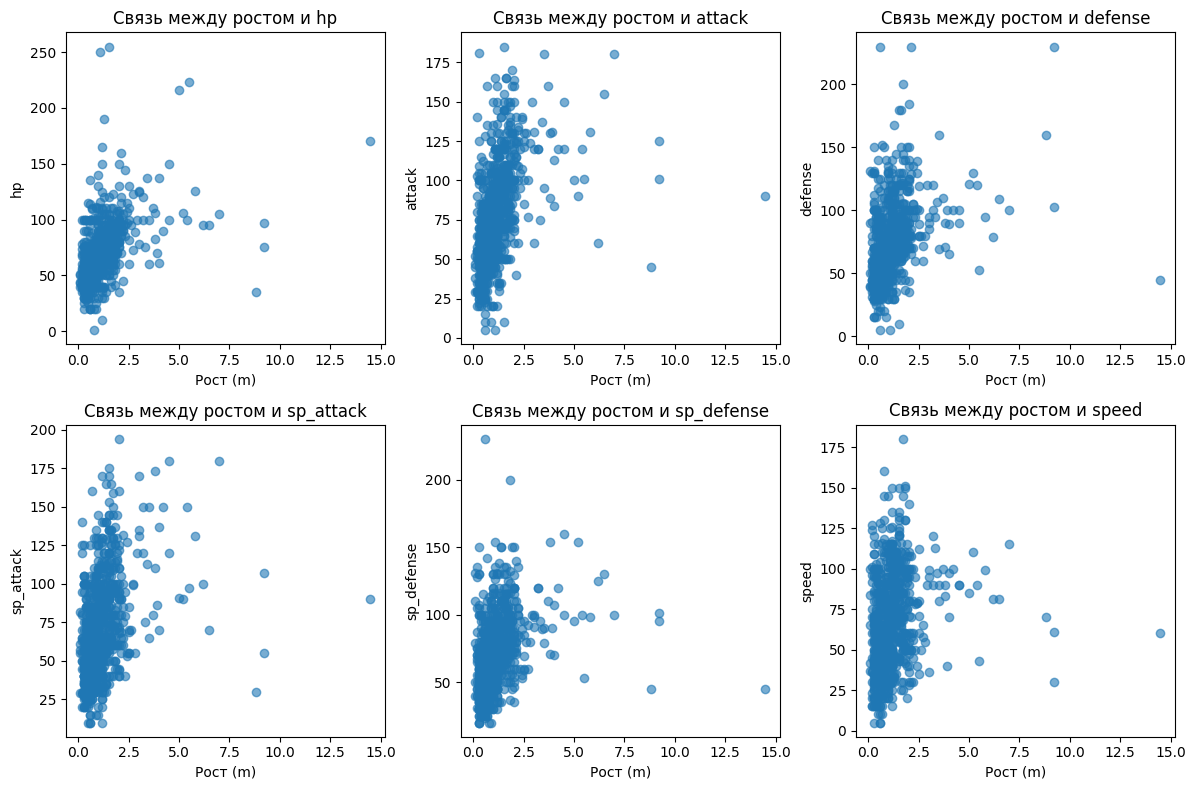

In [ ]:
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df['height_m'], df[feature], alpha=0.6)
    plt.title(f'Связь между ростом и {feature}')
    plt.xlabel('Рост (m)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

можем заметить, что рост покемонов не имеет сильной корреляции с их характеристиками

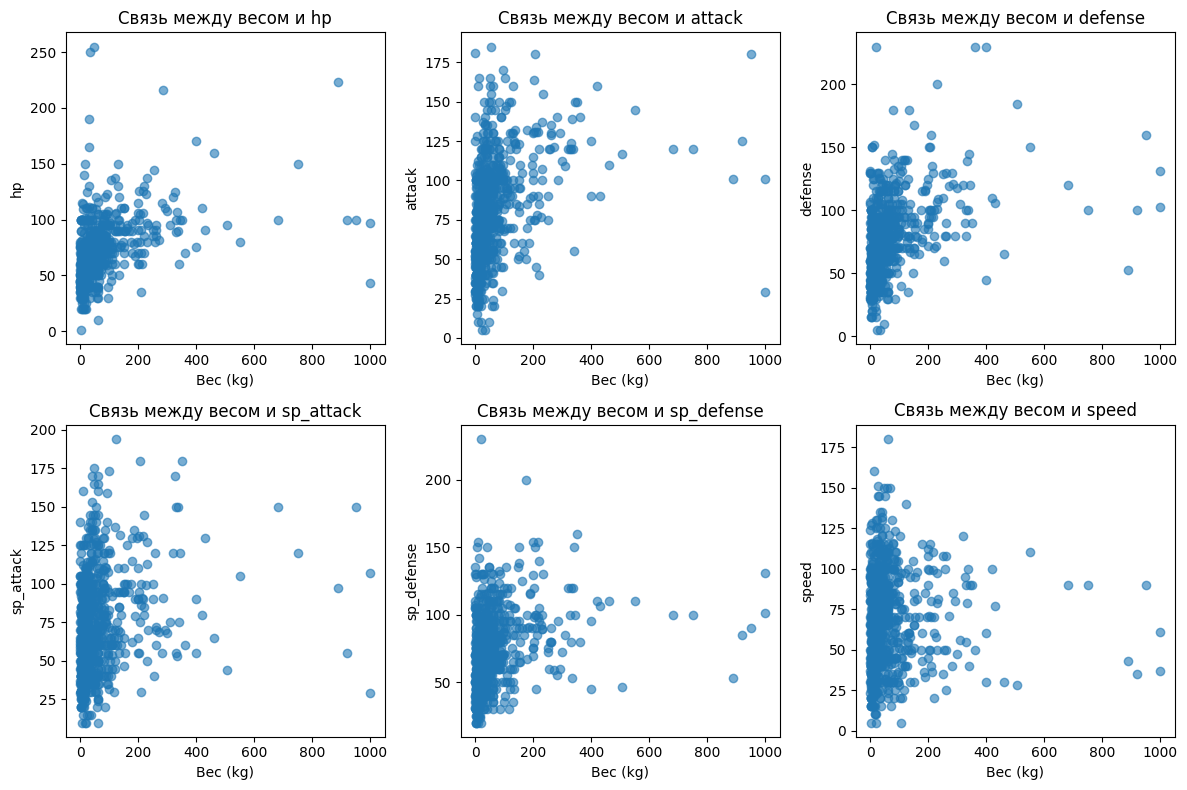

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df['weight_kg'], df[feature], alpha=0.6)
    plt.title(f'Связь между весом и {feature}')
    plt.xlabel('Вес (kg)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

На диаграммах видно, что МИНИМАЛЬНАЯ связь между весом и характеристиками hp, attack, defense, sp_attack и sp_defense присутствует. чем больше вес - тем больше показатель характеристики
Связь с весом и скоростью достаточно слабая, что указывает на то, что вес не имеет сильного влияния на скорость покемонов

In [ ]:
correlation_with_base_total = df[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_total']].corr()['base_total']
correlation_with_base_total

,base_total
hp,0.620624
attack,0.730134
defense,0.629620
sp_attack,0.741120
sp_defense,0.717434
speed,0.547666
base_total,1.000000


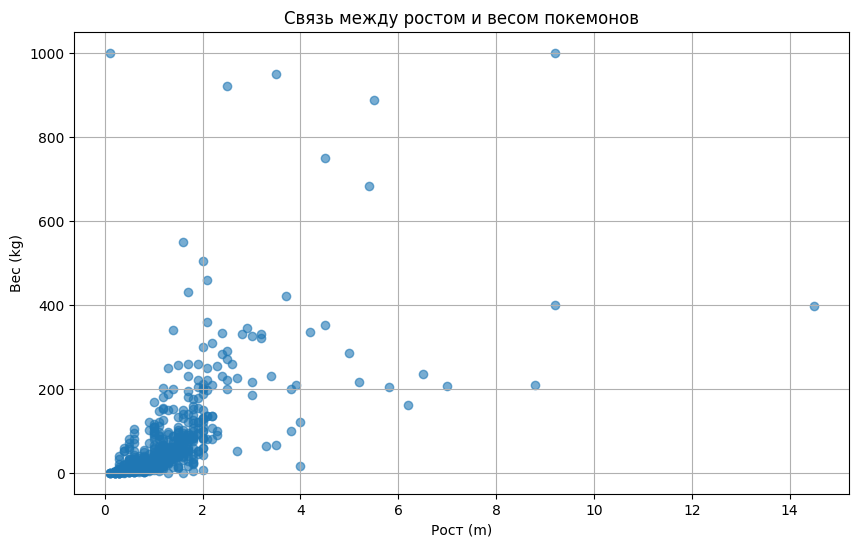

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['height_m'], df['weight_kg'], alpha=0.6)
plt.title('Связь между ростом и весом покемонов')
plt.xlabel('Рост (m)')
plt.ylabel('Вес (kg)')
plt.grid(True)
plt.show()

##Посмотрим как менялась сила покемонов по поколениям

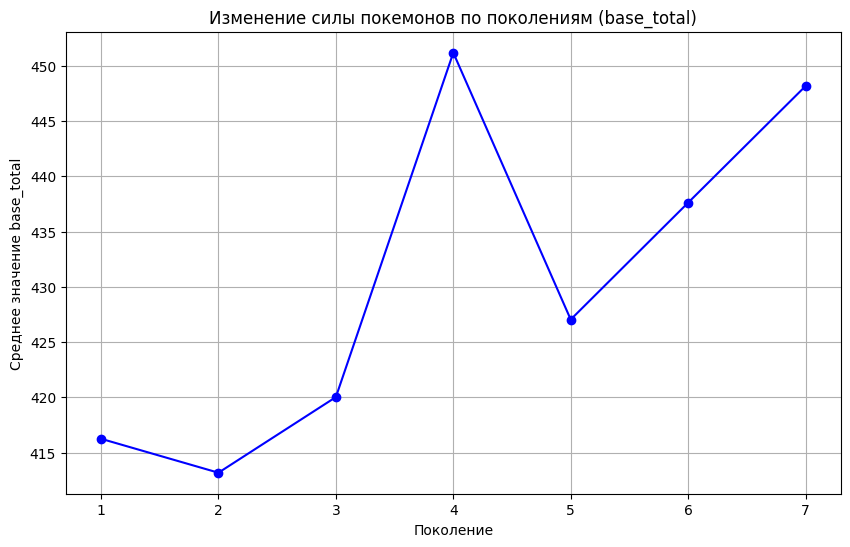

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.groupby('generation')['base_total'].mean(), marker='o', linestyle='-', color='b')
plt.title('Изменение силы покемонов по поколениям (base_total)')
plt.xlabel('Поколение')
plt.ylabel('Среднее значение base_total')
plt.grid(True)
plt.show()

самые сильные покемоны были в 4 поколении. в целом значение силы увеличивалось в поколениях, даже после скачка вниз с 4 поколения, средняя сила оставалась на более высоком уровне по сравнению с первыми поколениями

##Зависимость между легендарными покемонами и их характеристиками

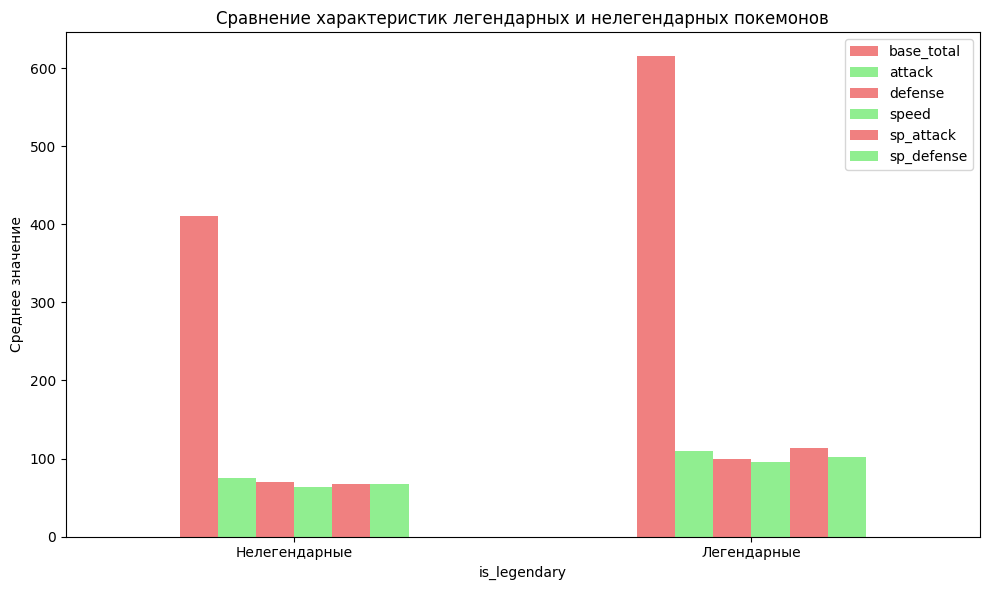

In [ ]:
legendary_comparison = df.groupby('is_legendary')[['base_total', 'attack', 'defense', 'speed', 'sp_attack', 'sp_defense']].mean()
legendary_comparison.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightgreen'])
plt.title('Сравнение характеристик легендарных и нелегендарных покемонов')
plt.ylabel('Среднее значение')
plt.xticks([0, 1], ['Нелегендарные', 'Легендарные'], rotation=0)
plt.tight_layout()
plt.show()

на столбчатой диаграмме показано сравнение характеристик между легендарными и нелегендарными покемонами. Видно, что легендарные покемоны в целом имеют значительно более высокие значения по base_total, attack, defense, speed, sp_attack и sp_defense
это подтверждает, что легендарные покемоны значительно сильнее, чем обычные покемоны, и обладают лучшими статистиками

## Среднее значение здоровья (hp) для различных типов и поколений

<ipython-input-113-2129103053>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='generation', y='hp', hue='type1', data=average_hp_by_type_and_generation, ci=None)


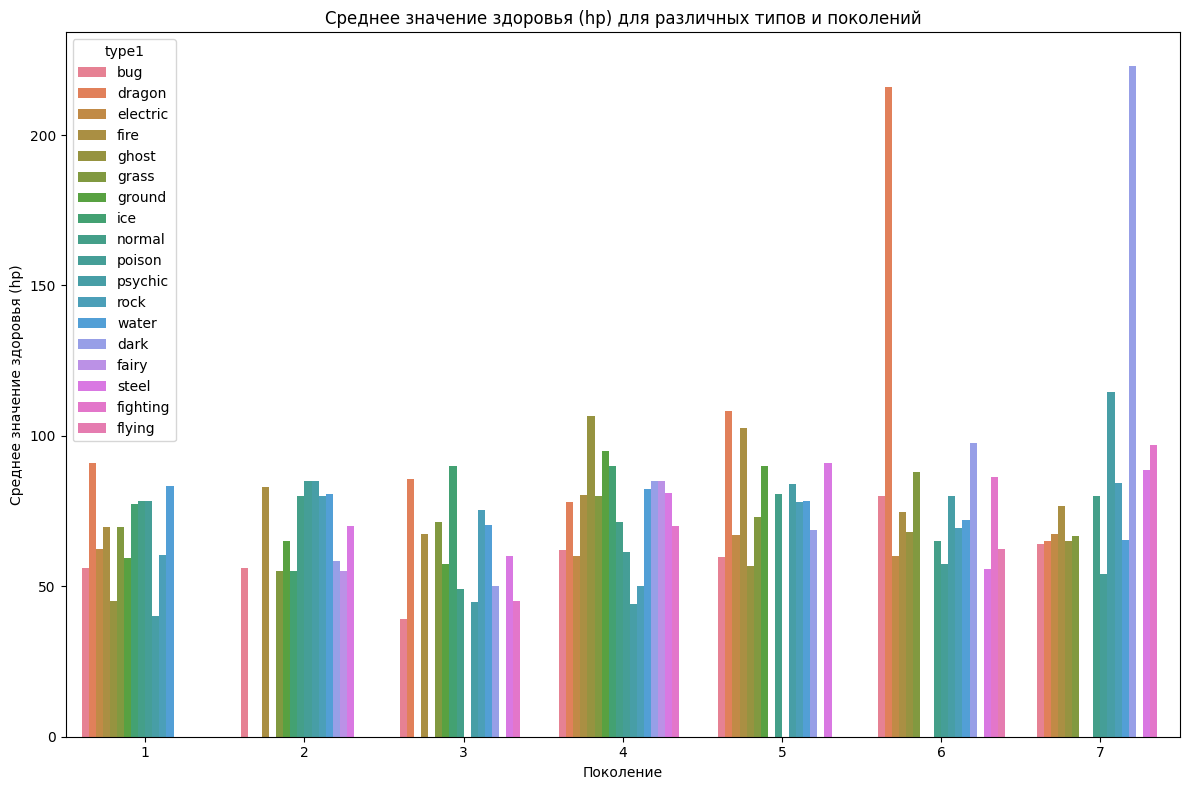

In [ ]:
plt.figure(figsize=(12, 8))
average_hp_by_type_and_generation = df.groupby(['type1', 'type2', 'generation'])['hp'].mean().reset_index()
sns.barplot(x='generation', y='hp', hue='type1', data=average_hp_by_type_and_generation, ci=None)
plt.title('Среднее значение здоровья (hp) для различных типов и поколений')
plt.xlabel('Поколение')
plt.ylabel('Среднее значение здоровья (hp)')
plt.tight_layout()
plt.show()

Видно, как среднее значение здоровья изменяется в зависимости от типа покемонов и их поколения

##Связь между процентом мужчин (percentage_male) и силой покемонов (base_total)

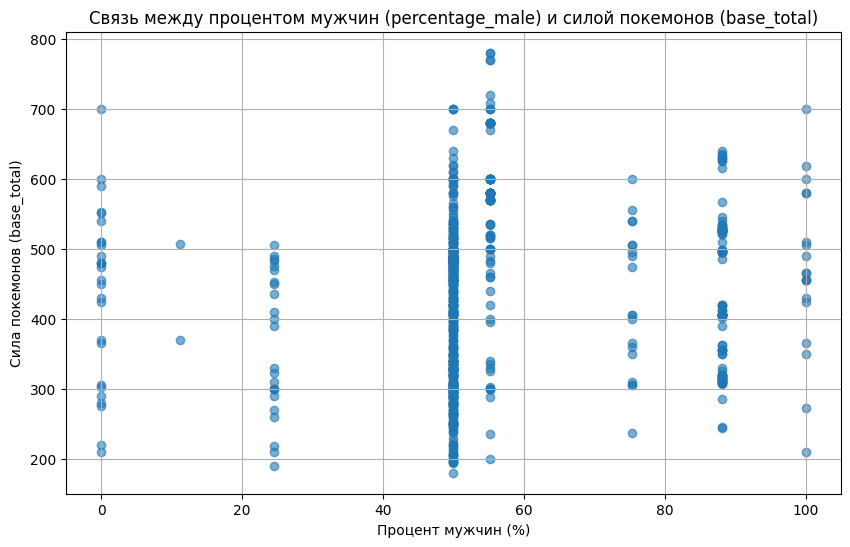

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['percentage_male'], df['base_total'], alpha=0.6)
plt.title('Связь между процентом мужчин (percentage_male) и силой покемонов (base_total)')
plt.xlabel('Процент мужчин (%)')
plt.ylabel('Сила покемонов (base_total)')
plt.grid(True)
plt.show()

Можно сделать вывод, что процент мужчин в популяции покемонов не оказывает значимого влияния на их общую силу

##Сравнение типов покемонов по атакующим и защитным характеристикам

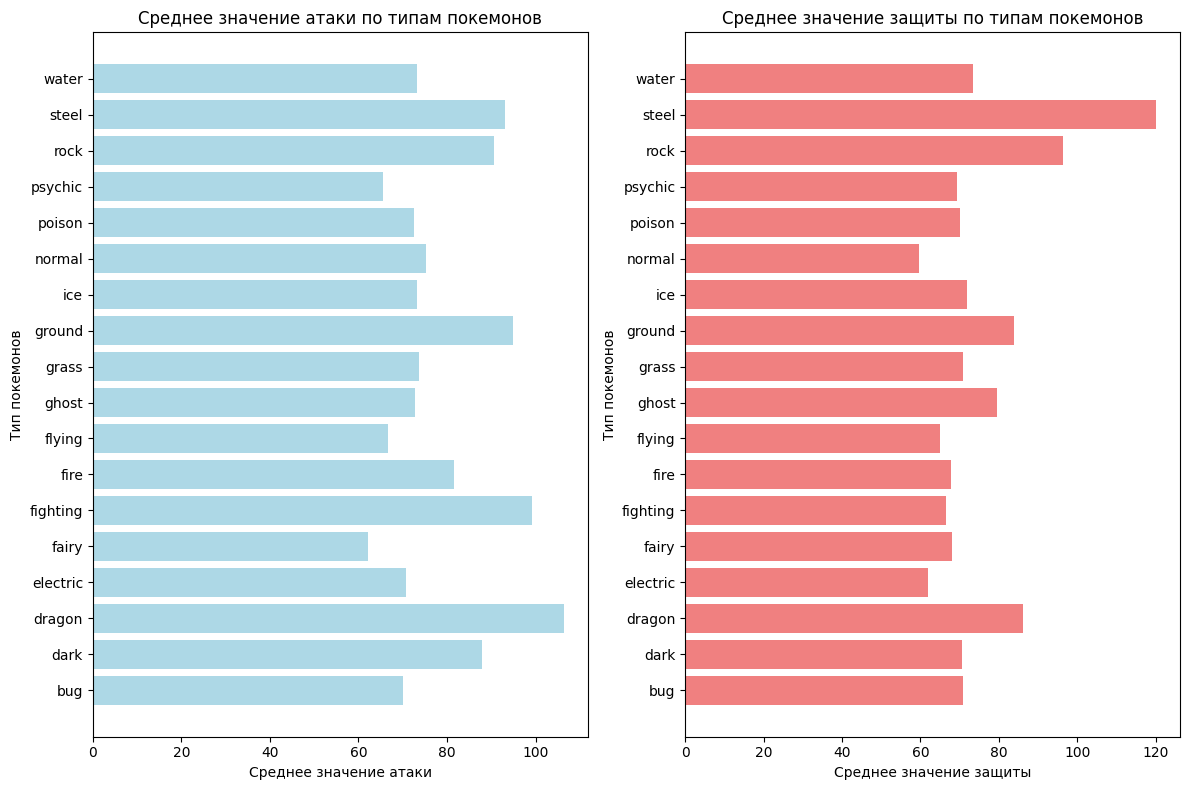

In [ ]:
average_attack_defense_by_type = df.groupby('type1')[['attack', 'defense']].mean().reset_index()
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.barh(average_attack_defense_by_type['type1'], average_attack_defense_by_type['attack'], color='lightblue')
plt.title('Среднее значение атаки по типам покемонов')
plt.xlabel('Среднее значение атаки')
plt.ylabel('Тип покемонов')

plt.subplot(1, 2, 2)
plt.barh(average_attack_defense_by_type['type1'], average_attack_defense_by_type['defense'], color='lightcoral')
plt.title('Среднее значение защиты по типам покемонов')
plt.xlabel('Среднее значение защиты')
plt.ylabel('Тип покемонов')

plt.tight_layout()
plt.show()

##Вывод
Покемоны в поздних поколениях становятся сильнее, что отражает более высокие средние значения base_total.
Легендарные покемоны имеют существенно лучшие характеристики по сравнению с обычными покемонами, что подтверждает их статус как элитных существ.
Типы покемонов играют ключевую роль в их характеристиках, таких как атака и защита, и определяют их стратегическую роль в бою.
Гендерные различия в популяции покемонов не влияют на их силу, что может свидетельствовать о других факторах, влияющих на характеристики покемонов.

In [ ]:
!ssh-keygen -t rsa -b 4096 -C "any_keys"

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:Timqc8tO6f+y52clF0KRVBFRY/KuBlj7qcB92+faWWc any_keys
The key's randomart image is:
+---[RSA 4096]----+
|         .o+*=+  |
|          o  + . |
|         ..   .  |
|         +....   |
|      . S o. ..  |
|     o = ..ooo   |
|    +   + .+*   E|
|  .=. . ..o+ o o=|
|  .+=oo*oo. . o=o|
+----[SHA256]-----+


In [ ]:
%cd ~/.ssh

/root/.ssh


In [ ]:
!touch config
!touch known_hosts

In [ ]:
!git add .
!git commit -m 'some commit'
!git push origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
